# BIKE SHARING ANALYIS

## 1. Importing Required Packages and Lib

In [42]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# from collections import defaultdicta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 2. Reading the Provided Data

In [43]:
# load the data file
bike=pd.read_csv("day.csv", parse_dates=['dteday'],index_col='instant')
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 3. Expolatory Data Analysis

### A. Data Understanding

In [44]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.2 KB


In [45]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [46]:
bike.shape

(730, 15)

In [47]:
bike.corr().min()

season       -0.229607
yr           -0.112547
mnth         -0.208013
holiday      -0.257009
weekday      -0.350848
workingday   -0.257009
weathersit   -0.295929
temp         -0.158186
atemp        -0.183876
hum          -0.248506
windspeed    -0.248506
casual       -0.350848
registered   -0.259025
cnt          -0.295929
dtype: float64

### Inference :
1. Dataset has 730 rows and 16 columns.
2. All the columns except one has are either float or integer data type.
3. Only one column is date type.
4. Observing the data, few attributes seems to be categorical in nature, but are of integer/float data type.
5. We will need to further analyse & conclude if we should convert them to categorical or treat as numerical values.
    

### B. Data Quality

In [48]:
bike_dup_check = bike.drop_duplicates()
bike_dup_check.shape

(730, 15)

In [49]:
bike.isnull().sum()/len(bike.index)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [50]:
bike=bike.rename(columns={'yr':'year','mnth':'month','temp':'tempC','atemp':'feelingTempC','hum':'humidity','cnt':'totalRentalCount','weathersit':'weather'})

In [51]:
bike_valuecount_check=bike.iloc[:,1:bike.shape[1]]

In [52]:
for attributes in bike_valuecount_check:
    print("Value counts of "+attributes)
    print(bike_valuecount_check[attributes].value_counts(ascending=False), '\n\n')

Value counts of season
3    188
2    184
1    180
4    178
Name: season, dtype: int64 


Value counts of year
1    365
0    365
Name: year, dtype: int64 


Value counts of month
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: month, dtype: int64 


Value counts of holiday
0    709
1     21
Name: holiday, dtype: int64 


Value counts of weekday
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 


Value counts of workingday
1    504
0    226
Name: workingday, dtype: int64 


Value counts of weather
1    463
2    246
3     21
Name: weather, dtype: int64 


Value counts of tempC
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: tempC, Length: 498, dtype: int64 


Value counts of feelingTempC
32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
     

### Inference :
1. The shape after running the drop duplicate command remains same as the original dataframe.Hence, the Dataset does not have duplicates
2. The Null Check gives zero, this concludes there are no nulls in the data
3. There seems to be no unknown values in the entire dataset, The data set seems to be good quality

### C. Data Cleanse

In [53]:
bike.columns

Index(['dteday', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'tempC', 'feelingTempC', 'humidity', 'windspeed', 'casual',
       'registered', 'totalRentalCount'],
      dtype='object')

In [54]:
bike = bike.rename(columns={"dteday": "date", 'yr':'year','mnth':'month','weathersit':'weather','atemp':'feelingTempC','hum':'humidity','cnt':'totalRentalCount','temp':'tempC'})

In [55]:
bike.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'tempC', 'feelingTempC', 'humidity', 'windspeed', 'casual',
       'registered', 'totalRentalCount'],
      dtype='object')

In [56]:
bikeuse=bike

In [57]:
bike['weekday'] = bike.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [58]:
bike.groupby(by='weekday').weekday.count()

weekday
friday       104
monday       105
saturday     104
sunday       104
thursday     104
tuesday      105
wednesday    104
Name: weekday, dtype: int64

In [59]:
import datetime
from scipy.stats import pearsonr

In [60]:
bike.month = bike.month.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

In [61]:
bike.month

instant
1       January
2       January
3       January
4       January
5       January
         ...   
726    December
727    December
728    December
729    December
730    December
Name: month, Length: 730, dtype: object

In [62]:
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [63]:
bike['weather'] = bike['weather'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
bike['weather'].value_counts()

clear    463
mist     246
light     21
Name: weather, dtype: int64

In [64]:
bike['date']=pd.to_datetime(bike['date']).dt.day

In [65]:
bike['date']=bike['date'].astype('int')

In [66]:
bike = bike.drop(columns=['feelingTempC','casual', 'registered'])

In [67]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    int32  
 1   season            730 non-null    object 
 2   year              730 non-null    int64  
 3   month             730 non-null    object 
 4   holiday           730 non-null    int64  
 5   weekday           730 non-null    object 
 6   workingday        730 non-null    int64  
 7   weather           730 non-null    object 
 8   tempC             730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  totalRentalCount  730 non-null    int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 71.3+ KB


### Inference :
    We have not taken forward 3 attributes into the dataframe forward due to the below reason - instant, steday, casual, registered is : 
            a. casual and registered : The column cnt contains total rental bikes, so we would not need casual and registered seprately rather use cnt
            b. feelingTempC: temp and feelingTempC are highgligh corelated -  any one can be dropped

### D. Operations for Linear Regression

In [68]:
new_bike=bike[['season', 'month', 'weekday','weather']]

In [69]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   730 non-null    object
 1   month    730 non-null    object
 2   weekday  730 non-null    object
 3   weather  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [70]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   730 non-null    object
 1   month    730 non-null    object
 2   weekday  730 non-null    object
 3   weather  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [71]:
# Convert to 'category' data type

new_bike['season']=new_bike['season'].astype('category')
new_bike['weather']=new_bike['weather'].astype('category')
new_bike['month']=new_bike['month'].astype('category')
new_bike['weekday']=new_bike['weekday'].astype('category')

In [72]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   season   730 non-null    category
 1   month    730 non-null    category
 2   weekday  730 non-null    category
 3   weather  730 non-null    category
dtypes: category(4)
memory usage: 9.6 KB


In [73]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

In [74]:
dummy_variables_columns = ['month', 'season', 'weekday', 'weather']

In [75]:
new_bike = pd.get_dummies(bike[dummy_variables_columns], drop_first=True)

In [76]:
new_bike.shape

(730, 22)

In [77]:
bike = pd.concat([bike, new_bike], axis=1)

In [78]:
bike = bike.drop(columns=dummy_variables_columns)

In [79]:
bike.shape

(730, 30)

In [80]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int32  
 1   year               730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   tempC              730 non-null    float64
 5   humidity           730 non-null    float64
 6   windspeed          730 non-null    float64
 7   totalRentalCount   730 non-null    int64  
 8   month_August       730 non-null    uint8  
 9   month_December     730 non-null    uint8  
 10  month_February     730 non-null    uint8  
 11  month_January      730 non-null    uint8  
 12  month_July         730 non-null    uint8  
 13  month_June         730 non-null    uint8  
 14  month_March        730 non-null    uint8  
 15  month_May          730 non-null    uint8  
 16  month_November     730 non

## 4. Feature Engineering: 
    We could create various new features that could be useful for this analysis as below

In [81]:
bike_fe=bikeuse

###### Feeling to Actual Temperature Ratio

In [82]:
bike_fe['temp_ratio']=round(bike_fe['feelingTempC']/bike_fe['tempC'],1)
bike_fe['temp_ratio']

instant
1      1.3
2      1.2
3      1.2
4      1.3
5      1.2
      ... 
726    1.1
727    1.2
728    1.2
729    1.1
730    1.3
Name: temp_ratio, Length: 730, dtype: float64

###### Weather Comfort Index

In [83]:
bike_fe['wci']=(bike_fe['feelingTempC']+bike_fe['humidity'])/4
bike_fe['wci'].value_counts()

25.669387    1
21.553013    1
21.052238    1
22.629175    1
21.544750    1
            ..
20.303587    1
22.059900    1
25.513650    1
25.988188    1
24.830975    1
Name: wci, Length: 730, dtype: int64

###### Registered to Casual User ratio

In [84]:
bike_fe['rc_ratio']=round((bike_fe['registered']/bike_fe['casual']),1)
bike_fe['rc_ratio'].value_counts()

1.9     19
1.8     18
4.7     16
5.8     15
2.1     14
        ..
18.2     1
21.1     1
27.8     1
35.4     1
22.7     1
Name: rc_ratio, Length: 193, dtype: int64

###### To check which features are following Gausian Distribution

windspeed


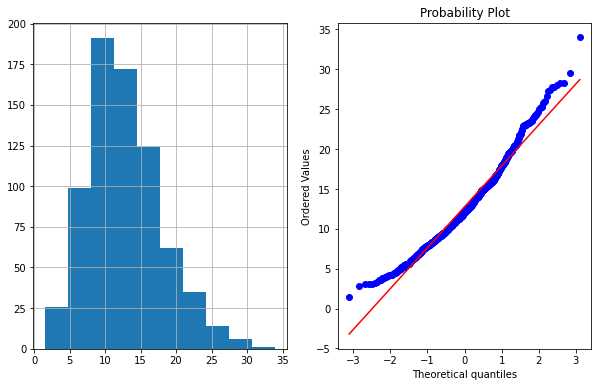

rc_ratio


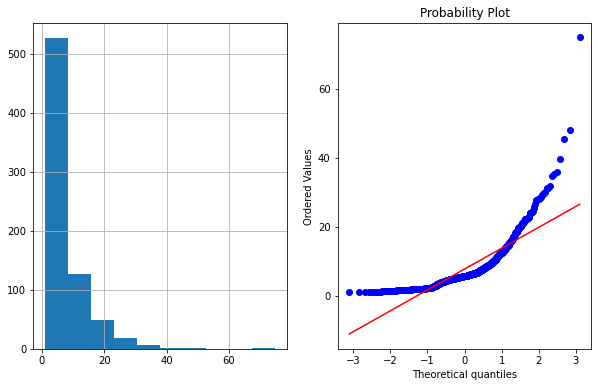

temp_ratio


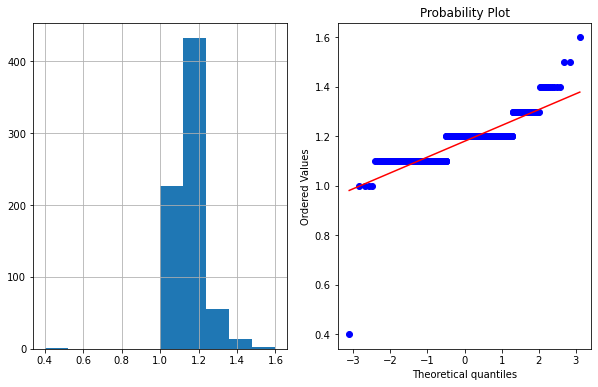

wci


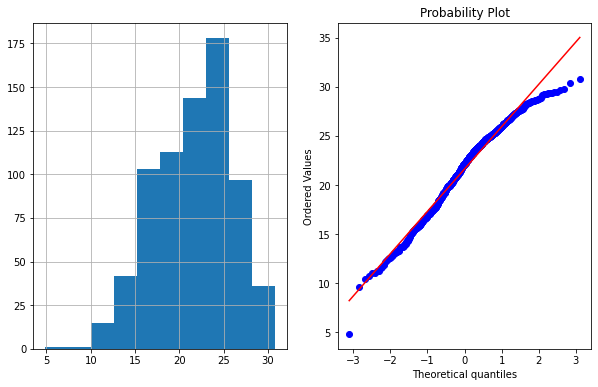

In [516]:
def plot_data(df, feature):
    # This is for the left graph
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    print(feature)
    df[feature].hist()
    # This is for the right graph
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()


plot_data(bike_fe, 'windspeed')
plot_data(bike_fe, 'rc_ratio')
plot_data(bike_fe, 'temp_ratio')
plot_data(bike_fe, 'wci')

## 5.Splitting Data

In [85]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int32  
 1   year               730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   tempC              730 non-null    float64
 5   humidity           730 non-null    float64
 6   windspeed          730 non-null    float64
 7   totalRentalCount   730 non-null    int64  
 8   month_August       730 non-null    uint8  
 9   month_December     730 non-null    uint8  
 10  month_February     730 non-null    uint8  
 11  month_January      730 non-null    uint8  
 12  month_July         730 non-null    uint8  
 13  month_June         730 non-null    uint8  
 14  month_March        730 non-null    uint8  
 15  month_May          730 non-null    uint8  
 16  month_November     730 non

In [86]:
bike.shape

(730, 30)

In [87]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 654 to 80
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               510 non-null    int32  
 1   year               510 non-null    int64  
 2   holiday            510 non-null    int64  
 3   workingday         510 non-null    int64  
 4   tempC              510 non-null    float64
 5   humidity           510 non-null    float64
 6   windspeed          510 non-null    float64
 7   totalRentalCount   510 non-null    int64  
 8   month_August       510 non-null    uint8  
 9   month_December     510 non-null    uint8  
 10  month_February     510 non-null    uint8  
 11  month_January      510 non-null    uint8  
 12  month_July         510 non-null    uint8  
 13  month_June         510 non-null    uint8  
 14  month_March        510 non-null    uint8  
 15  month_May          510 non-null    uint8  
 16  month_November     510 no

In [89]:
df_train.shape

(510, 30)

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 185 to 73
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               219 non-null    int32  
 1   year               219 non-null    int64  
 2   holiday            219 non-null    int64  
 3   workingday         219 non-null    int64  
 4   tempC              219 non-null    float64
 5   humidity           219 non-null    float64
 6   windspeed          219 non-null    float64
 7   totalRentalCount   219 non-null    int64  
 8   month_August       219 non-null    uint8  
 9   month_December     219 non-null    uint8  
 10  month_February     219 non-null    uint8  
 11  month_January      219 non-null    uint8  
 12  month_July         219 non-null    uint8  
 13  month_June         219 non-null    uint8  
 14  month_March        219 non-null    uint8  
 15  month_May          219 non-null    uint8  
 16  month_November     219 no

In [91]:
df_test.shape

(219, 30)

## 6. Visualising the Train Data

###### Visualising the Categorical Variables

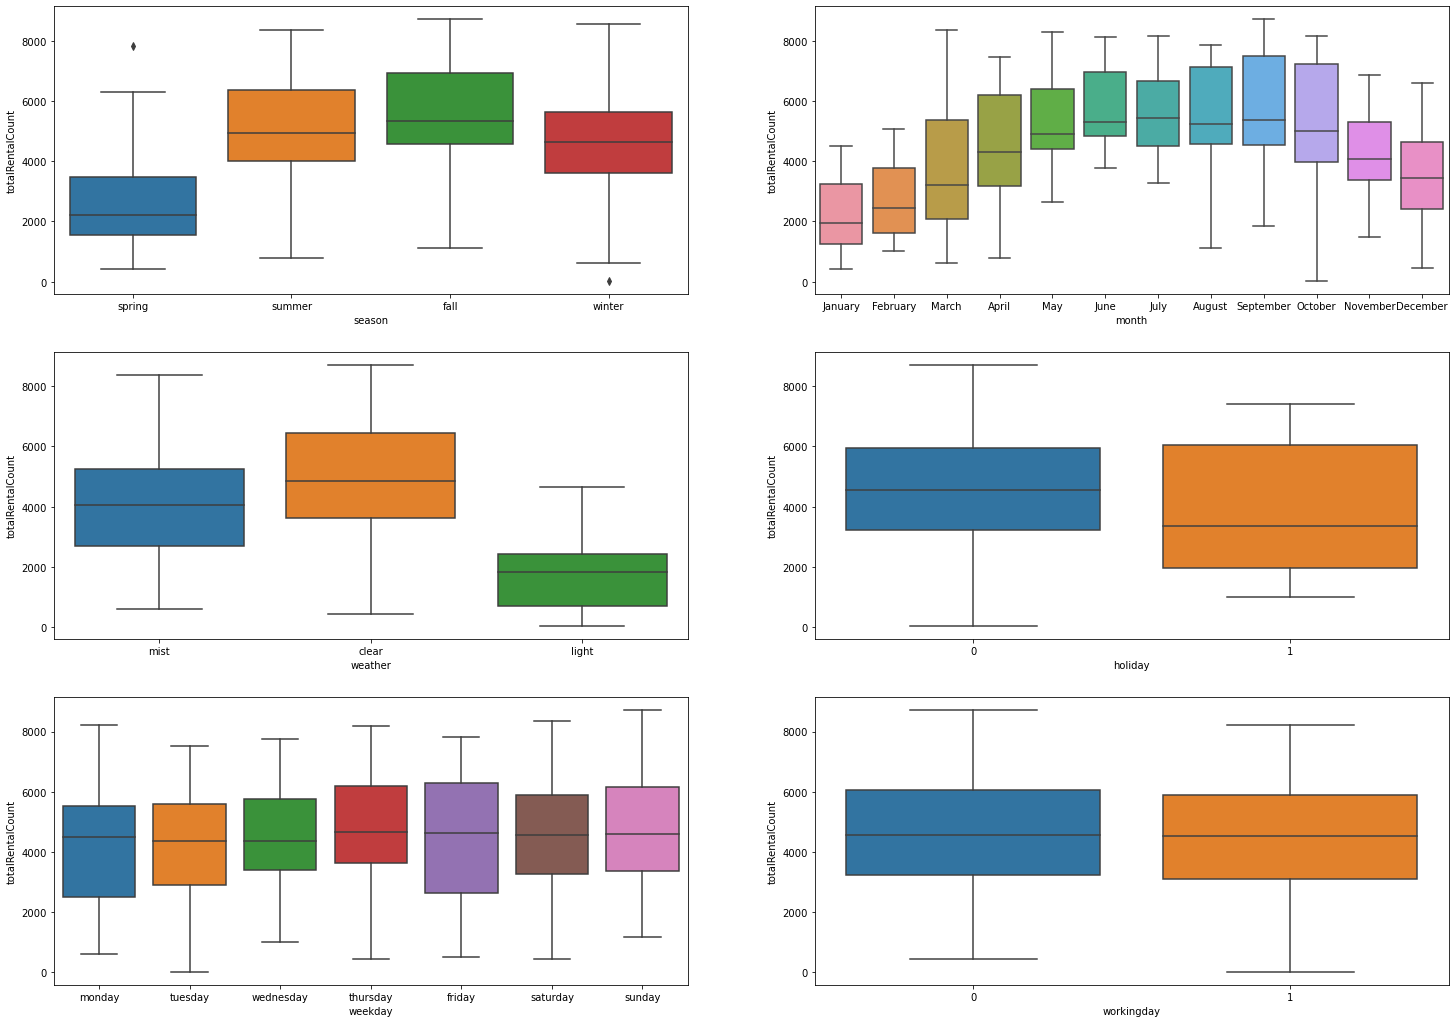

In [92]:
##We need to perform the EDA on TRAINING (df_train) Dataset.

plt.figure(figsize=(25, 18))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'totalRentalCount', data = bikeuse )
plt.subplot(3,2,2)
sns.boxplot(x = 'month', y = 'totalRentalCount', data = bikeuse)
plt.subplot(3,2,3)
sns.boxplot(x = 'weather', y = 'totalRentalCount', data = bikeuse)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'totalRentalCount', data = bikeuse)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'totalRentalCount', data = bikeuse)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'totalRentalCount', data = bikeuse)
plt.show()

### Inference : 
    There were 6 categorical variables in the dataset.

    We have used Box plot to understand their effect on the dependent variable (‘totalRentalCount’) .

    The inference that We could derive were:
    season: ~30% of the bike booking were happening in season3 with a median of over 5000 booking for the period of 2 years.

    month: ~10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month.

    weathers: ~65% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking for the period of 2 years. 

    holiday: ~98% of the bike booking were happening when it is not a holiday which means this data is clearly biased. 
    
    weekday: weekday variable shows very close trend (between ~13%- ~14% of total booking on all days of the week) having their independent medians between ~4000 to ~5000 bookings. 
    
    workingday: ~70% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking for the period of 2 years. 
    
    The above concludes to :  season,month,weathers,workingday can be a good predictor for the dependent variable
    
    The above concludes to : holiday CANNOT be a good predictor for the dependent variable.
    
     The above concludes to : weekday can have some or no influence towards the predictor.Let us allow the model decide if this needs to be added or not

###### Visualising the Numerical Variables

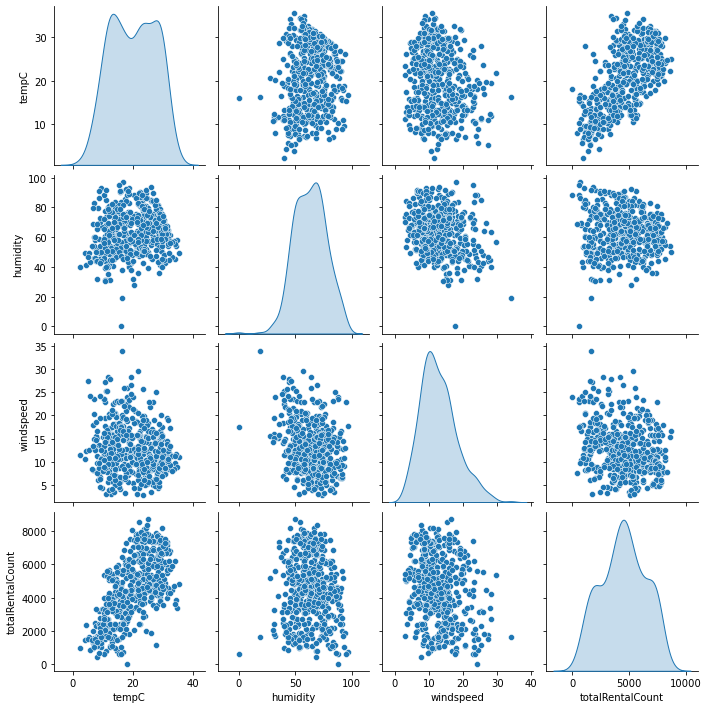

In [93]:
bike_numeric=df_train[[ 'tempC', 'humidity', 'windspeed','totalRentalCount']]
sns.pairplot(bike_numeric, diag_kind='kde')
plt.show()

### Inference : 
    The above Pair-Plot tells us that there is a LINEAR RELATION between 'tempC','feelingtempC' and 'totalRentalCount'


###### Correlation Matrix

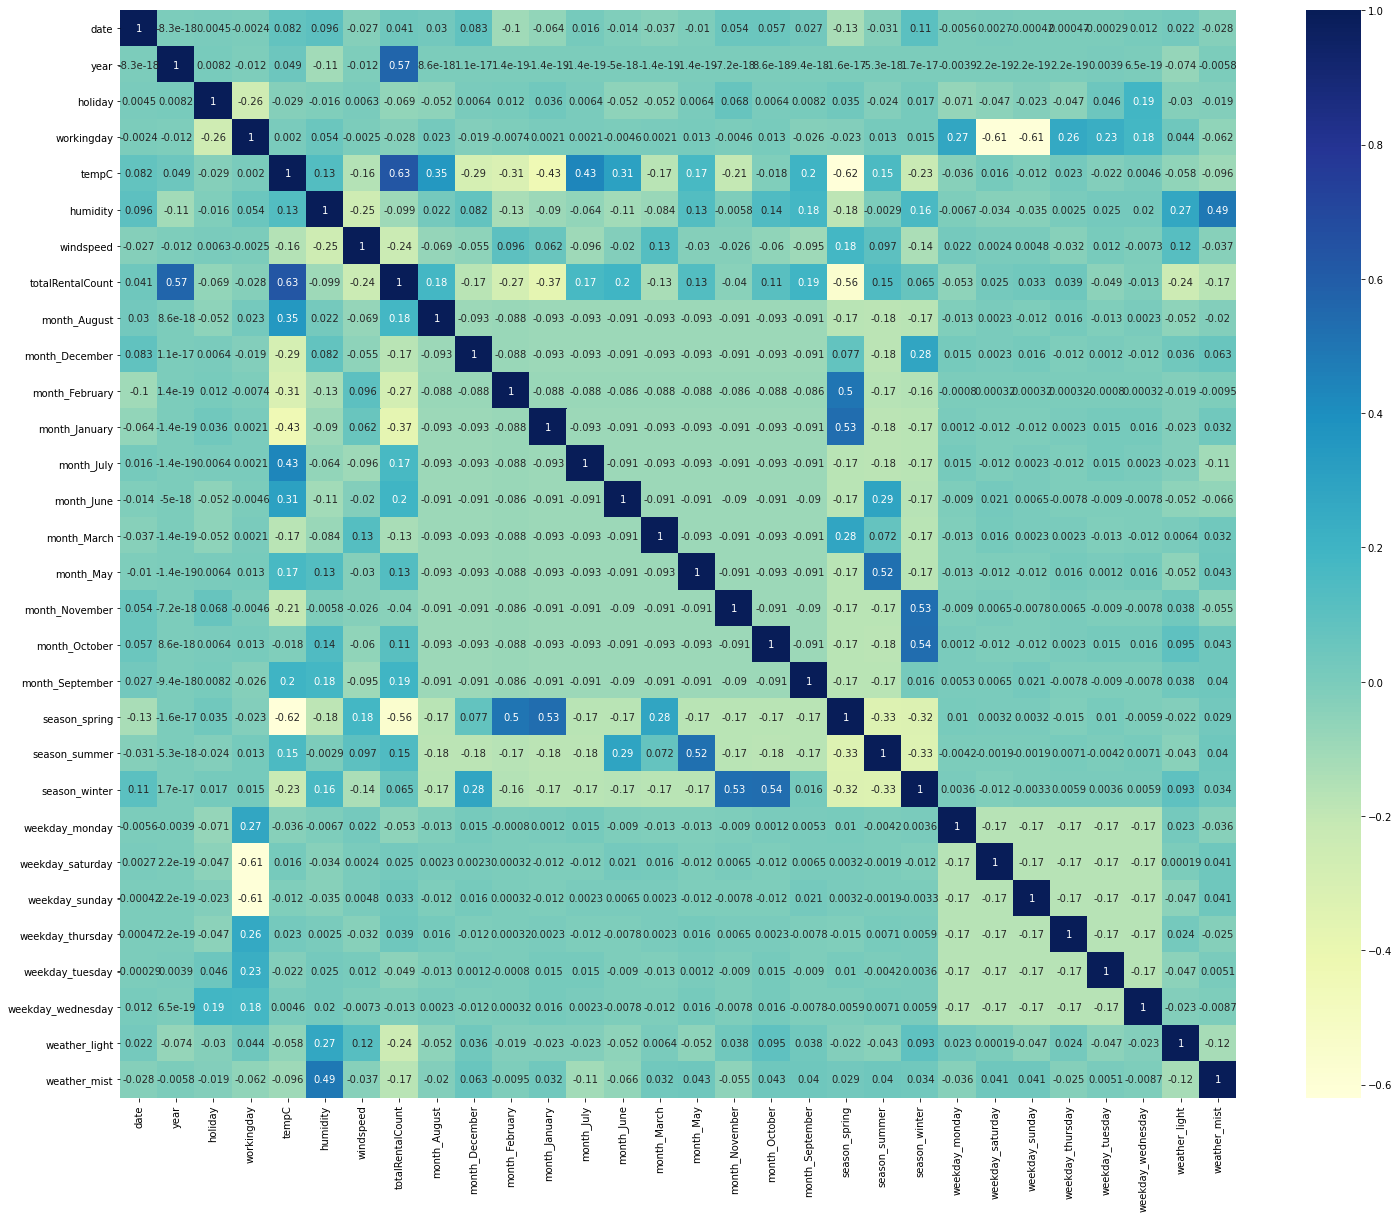

In [98]:
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference : 
    The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
    tempC and year have a high correlation with totalRentalCount.
    We will refer this map while building the linear model to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## 7. Rescaling the Features

In [528]:
scaler = MinMaxScaler()

In [529]:
df_train.head()

,date,year,holiday,workingday,tempC,humidity,windspeed,totalRentalCount,month_August,month_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
instant,,,,,,,,,,,,,,,,,,,,,
654,16,1,0,1,19.201653,55.8333,12.208807,7534,0,0,...,0,1,0,0,0,0,0,1,0,0
577,31,1,0,1,29.246653,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
427,3,1,0,0,16.980847,62.1250,10.792293,4066,0,0,...,0,0,0,0,1,0,0,0,0,1
729,30,1,0,1,10.489153,48.3333,23.500518,1796,0,1,...,0,0,1,0,0,0,0,0,0,0
483,28,1,0,0,15.443347,48.9583,8.708325,4220,0,0,...,1,0,0,0,1,0,0,0,0,1


In [530]:
df_train.columns

Index(['date', 'year', 'holiday', 'workingday', 'tempC', 'humidity',
       'windspeed', 'totalRentalCount', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'season_spring', 'season_summer', 'season_winter',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'weather_light', 'weather_mist'],
      dtype='object')

In [531]:
# Appling scaler() to all the numeric variables

num_vars = ['date', 'tempC', 'humidity', 'windspeed','totalRentalCount']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [532]:
df_train.head()

,date,year,holiday,workingday,tempC,humidity,windspeed,totalRentalCount,month_August,month_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
instant,,,,,,,,,,,,,,,,,,,,,
654,0.500000,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,0,1,0,0
577,1.000000,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
427,0.066667,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
729,0.966667,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
483,0.900000,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1


In [533]:
df_train.describe()

,date,year,holiday,workingday,tempC,humidity,windspeed,totalRentalCount,month_August,month_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488366,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.245098,0.24902,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.294747,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.430568,0.43287,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8. Linear Regression Model Build

### A.Defining Target & Feature Variables

In [534]:
X_train = df_train
y_train = df_train.pop('totalRentalCount')

In [535]:
y_train

instant
654    0.864243
577    0.827658
427    0.465255
729    0.204096
483    0.482973
         ...   
527    0.764151
579    0.832835
54     0.218017
351    0.312586
80     0.236424
Name: totalRentalCount, Length: 510, dtype: float64

### B. Iterative Modeling Process
        Currently, we have a lot of Predictors to Predict our outcome.Analysing these many predictors can be very hectic.
    To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)
    We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

###### 
    Creating a generalised/common function for evaluating Variance Inflation Factor for every model and prediction we make

In [536]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [537]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

#### B.1. Recursive Feature Elimination Application

In [538]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [539]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [540]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
28,weather_mist,True,1
19,season_summer,True,1
15,month_November,True,1
27,weather_light,True,1
20,season_winter,True,1
11,month_July,True,1
10,month_January,True,1
17,month_September,True,1
18,season_spring,True,1
6,windspeed,True,1


#### Inference : RFE method has successfully evaluated top 15 predictors which will impact our outcome.
    But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

#### B.2. Model Building Process - 1

In [555]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       totalRentalCount   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        10:58:39   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036      8.886      0.000       0.249       0.391
year                0.2303      0.008     28.511      0.000       0.214       0.246
holiday            -0.0912      0.026     -3.566      0.000      -0.141      -0.041
tempC               0.4800      0.037     12.977      0.000       0.407       0.553
humidity           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed          -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_December     -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_January      -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_July         -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_November     -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_September     0.0749      0.017      4.438      0.000       0.042       0.108
season_spring      -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer       0.0408      0.015      2.659      0.008       0.011       0.071
season_winter       0.1034      0.018      5.763      0.000       0.068       0.139
weather_light      -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_mist       -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [557]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,humidity,30.94
1,tempC,17.80
2,windspeed,4.72
3,season_spring,4.37
4,season_winter,4.06
5,season_summer,2.81
6,weather_mist,2.32
7,year,2.09
8,month_November,1.83
9,month_January,1.75


#### Inference:
    
    From the above observations, we see that the p-values of all features are under control. So we will proceed ahead to VIF table
    
    In the VIF table, we see that Humidity column seems to be explained by some other feature. So we will again drop this humidity feature and design our model.

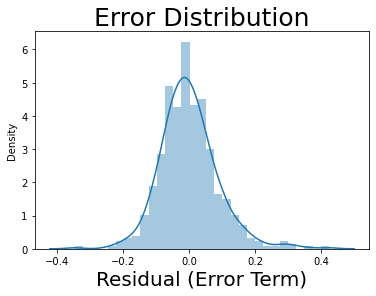

In [558]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

#### B.3. Model Building Process - 2

In [559]:
col = col.drop(['humidity'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       totalRentalCount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        11:00:39   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2466      0.032      7.679      0.000       0.184       0.310
year                0.2343      0.008     28.709      0.000       0.218       0.250
holiday            -0.0919      0.026     -3.533      0.000      -0.143      -0.041
tempC               0.4377      0.036     12.083      0.000       0.366       0.509
windspeed          -0.1586      0.025     -6.290      0.000      -0.208      -0.109
month_December     -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_January      -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_July         -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_November     -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_September     0.0682      0.017      3.992      0.000       0.035       0.102
season_spring      -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer       0.0333      0.015      2.148      0.032       0.003       0.064
season_winter       0.0887      0.018      4.951      0.000       0.053       0.124
weather_light      -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_mist       -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [560]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,tempC,5.17
1,windspeed,4.67
2,season_winter,2.94
3,season_spring,2.89
4,season_summer,2.23
5,year,2.07
6,month_November,1.80
7,month_January,1.66
8,month_July,1.59
9,weather_mist,1.56


#### Inference : 
    From the Model Summary Report we can say that all the p-values of respective features are well under control
    Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
    
    We see that all the features under VIF table are well under control, so we can fix the features available for our mode

## 9. Linear Regression Assumptions

### A. Assumption of Normally Distributed Error Terms

After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

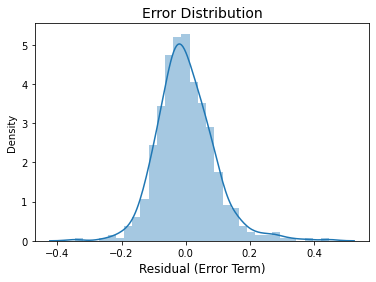

In [564]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 12})
plt.title('Error Distribution', fontdict={'fontsize': 14})
plt.show()

Note: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

### B. Assumption of Error Terms Being Independent

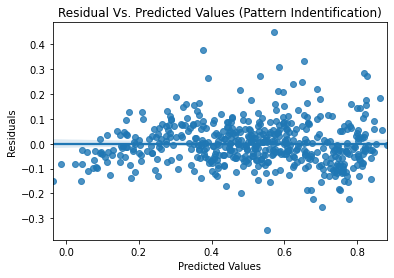

In [572]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 12})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show()

In [567]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 9.645062526431047e-16


From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

### C.Multicorrelation

This asumption is already taken care of while building model by calculating VIF of evry predictor. Following is the final VIF value of all the predictors used in the model

In [573]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,tempC,5.17
1,windspeed,4.67
2,season_winter,2.94
3,season_spring,2.89
4,season_summer,2.23
5,year,2.07
6,month_November,1.80
7,month_January,1.66
8,month_July,1.59
9,weather_mist,1.56


Evaluating Correlation Co-efficients of Predictors Impacting Target Variable (Individually)

In [574]:
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
tempC,0.64
year,0.59
season_spring,-0.55
month_January,-0.38
windspeed,-0.25
weather_light,-0.23
month_September,0.20
weather_mist,-0.18
month_July,0.16
month_December,-0.14


### D.Homoscedasticity

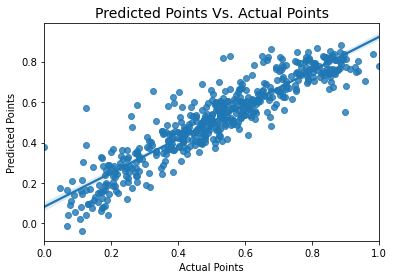

In [576]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 14})
plt.xlabel('Actual Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points', fontdict={'fontsize': 10})
plt.show()

    From the above graph, we can say that residuals are equally distributed across predicted value.
    This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.
    This prooves Homoscedasticity of Error Terms

## 10.Predicting on Test Data

In [594]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head(10)

,date,year,holiday,workingday,tempC,humidity,windspeed,totalRentalCount,month_August,month_December,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weather_light,weather_mist
instant,,,,,,,,,,,,,,,,,,,,,
185,0.200000,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
536,0.633333,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,0,0
300,0.866667,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
222,0.233333,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
153,0.166667,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,0,0
405,0.033333,1,0,0,0.256524,0.579218,0.326196,0.438104,0,0,...,0,0,0,1,0,0,0,0,0,0
199,0.566667,0,0,1,0.856704,0.671103,0.372990,0.510354,0,0,...,0,0,0,0,0,0,0,1,0,0
172,0.666667,0,0,1,0.774672,0.793903,0.276724,0.553728,0,0,...,0,0,0,0,0,1,0,0,0,1
513,0.900000,1,1,0,0.814131,0.696865,0.331536,0.692706,0,0,...,1,0,0,0,0,0,1,0,0,0


In [595]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 185 to 73
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               219 non-null    float64
 1   year               219 non-null    int64  
 2   holiday            219 non-null    int64  
 3   workingday         219 non-null    int64  
 4   tempC              219 non-null    float64
 5   humidity           219 non-null    float64
 6   windspeed          219 non-null    float64
 7   totalRentalCount   219 non-null    float64
 8   month_August       219 non-null    uint8  
 9   month_December     219 non-null    uint8  
 10  month_February     219 non-null    uint8  
 11  month_January      219 non-null    uint8  
 12  month_July         219 non-null    uint8  
 13  month_June         219 non-null    uint8  
 14  month_March        219 non-null    uint8  
 15  month_May          219 non-null    uint8  
 16  month_November     219 no

In [596]:
y_test = df_test.pop('totalRentalCount')
X_test = df_test

In [597]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [598]:
y_test_pred = lr_model.predict(X_test_new)

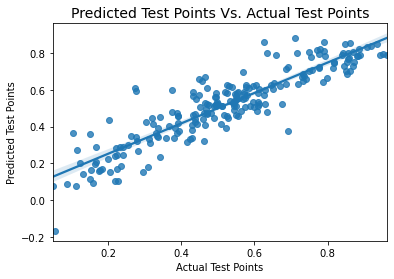

In [600]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 14})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 10})
plt.show()

Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

## 11.Generating R-Square

In [601]:
from sklearn.metrics import r2_score

In [603]:
r2=r2_score(y_test, y_test_pred)
r2

0.8132736736429255

## 12.Adjusted R^2 Value for TEST

Formula for Adjusted R^2

R2adj.=1−(1−R2)∗(n−1/n−p−1)

In [604]:
X_test.shape

(219, 29)

In [605]:
n = X_test.shape[0]
p = X_test.shape[1]

In [606]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7846225442018928